In [1]:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cftime
import pandas as pd

# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [2]:
data_dir='/Users/pvb/Dropbox/Oceanografia/Data/Climatologias/RG_ArgoClim/NC/'

In [3]:
# Load anomaly data until 2019 and the mean T and S
fileSalt2019 = data_dir+'RG_ArgoClim_Salinity_2019.nc'
fileTemp2019 = data_dir+'RG_ArgoClim_Temperature_2019.nc'

XrTemp2019 = xr.open_dataset(fileTemp2019, decode_times=False)
XrSalt2019 = xr.open_dataset(fileSalt2019, decode_times=False)

In [4]:
T_mean = XrTemp2019.ARGO_TEMPERATURE_MEAN
S_mean = XrSalt2019.ARGO_SALINITY_MEAN

T0_anom = XrTemp2019.ARGO_TEMPERATURE_ANOMALY
S0_anom = XrSalt2019.ARGO_SALINITY_ANOMALY

In [5]:
files = []
for iy in range(2019,2023):
    for im in range(1,13):
        files.append(data_dir+"RG_ArgoClim_%04d%02d_2019.nc"%(iy,im))

In [6]:
iy = 2023
for im in range(1,13):
    files.append(data_dir+"RG_ArgoClim_%04d%02d_2019.nc"%(iy,im))

In [7]:
data = xr.open_mfdataset(files, decode_times=False)

In [8]:
T1_anom = data.ARGO_TEMPERATURE_ANOMALY
S1_anom = data.ARGO_SALINITY_ANOMALY

In [9]:
T_anom=xr.concat([T0_anom,T1_anom],dim='TIME')
S_anom=xr.concat([S0_anom,S1_anom],dim='TIME')

In [10]:
T=T_anom+T_mean
S=S_anom+S_mean

In [11]:
T

<xarray.DataArray (TIME: 240, PRESSURE: 58, LATITUDE: 145, LONGITUDE: 360)> Size: 3GB
dask.array<add, shape=(240, 58, 145, 360), dtype=float32, chunksize=(83, 58, 83, 83), chunktype=numpy.ndarray>
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 1kB 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * LATITUDE   (LATITUDE) float32 580B -64.5 -63.5 -62.5 ... 77.5 78.5 79.5
  * PRESSURE   (PRESSURE) float32 232B 2.5 10.0 20.0 ... 1.9e+03 1.975e+03
  * TIME       (TIME) float32 960B 0.5 1.5 2.5 3.5 ... 236.5 237.5 238.5 239.5

In [12]:
temperature=T.values
salinity=S.values
lon=T.LONGITUDE.values
lat=T.LATITUDE.values
pre=T.PRESSURE.values
time = pd.date_range(start="2004-01-01", periods=240,freq='MS')+pd.DateOffset(days=14)
reference_time = pd.Timestamp("2004-04-01")

In [13]:
lon

array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,
        45.5,  46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,
        54.5,  55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,  62.5,
        63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,  70.5,  71.5,
        72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,  80.5,
        81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5,
        90.5,  91.5,  92.5,  93.5,  94.5,  95.5,  96.5,  97.5,  98.5,
        99.5, 100.5, 101.5, 102.5, 103.5, 104.5, 105.5, 106.5, 107.5,
       108.5, 109.5, 110.5, 111.5, 112.5, 113.5, 114.5, 115.5, 116.5,
       117.5, 118.5, 119.5, 120.5, 121.5, 122.5, 123.5, 124.5, 125.5,
       126.5, 127.5,

In [14]:
time

DatetimeIndex(['2004-01-15', '2004-02-15', '2004-03-15', '2004-04-15',
               '2004-05-15', '2004-06-15', '2004-07-15', '2004-08-15',
               '2004-09-15', '2004-10-15',
               ...
               '2023-03-15', '2023-04-15', '2023-05-15', '2023-06-15',
               '2023-07-15', '2023-08-15', '2023-09-15', '2023-10-15',
               '2023-11-15', '2023-12-15'],
              dtype='datetime64[ns]', length=240, freq=None)

In [13]:
RG = xr.Dataset(
    data_vars=dict(
        temperature=(["time","pre","lat","lon"], temperature),
        salinity=(["time","pre","lat","lon"], salinity),
    ),
    coords=dict(
        lon=(["lon"], lon),
        lat=(["lat"], lat),
        pre=(["pre"], pre),
        time=time,
    ),
    attrs=dict(description="Roemmich-Gilson Argo Climatology"),
)

In [14]:
RG

<xarray.Dataset> Size: 6GB
Dimensions:      (time: 240, pre: 58, lat: 145, lon: 360)
Coordinates:
  * lon          (lon) float32 1kB 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * lat          (lat) float32 580B -64.5 -63.5 -62.5 -61.5 ... 77.5 78.5 79.5
  * pre          (pre) float32 232B 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
  * time         (time) datetime64[ns] 2kB 2004-01-15 2004-02-15 ... 2023-12-15
Data variables:
    temperature  (time, pre, lat, lon) float32 3GB -0.033 -0.045 ... nan nan
    salinity     (time, pre, lat, lon) float32 3GB 33.75 33.74 33.73 ... nan nan
Attributes:
    description:  Roemmich-Gilson Argo Climatology

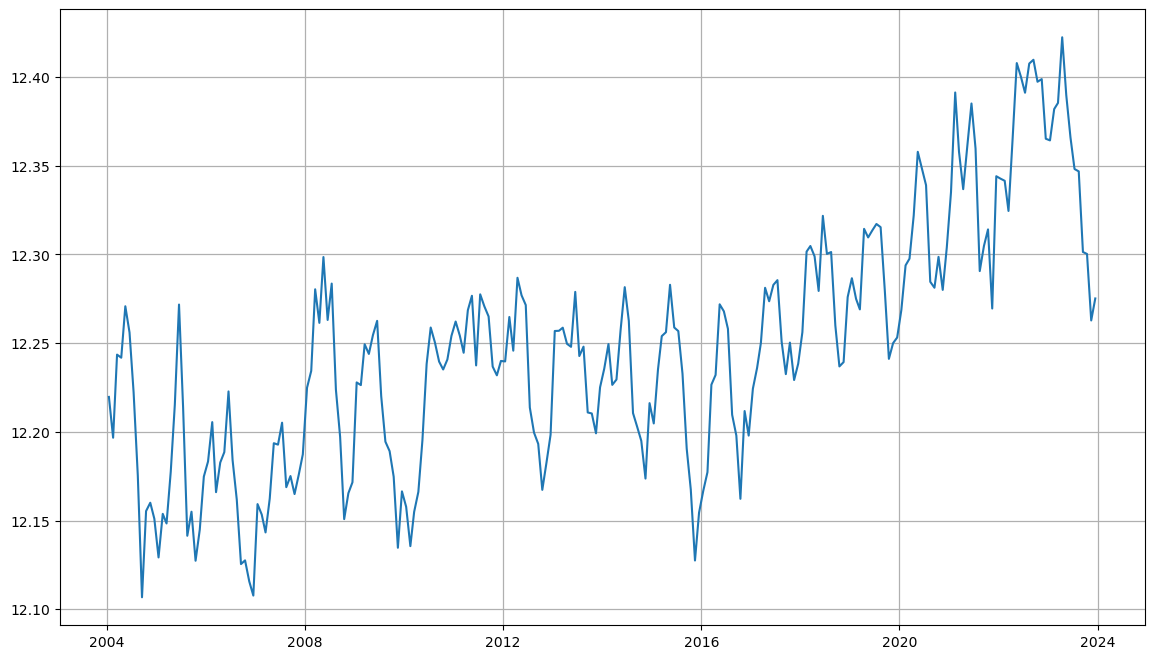

In [15]:
fig, ax = plt.subplots(1 , 1 , figsize = (14,8))
ax.plot(RG.time,
        RG.temperature.sel(lat=slice( -60, 60)).mean(dim='lat').mean(dim='lon').sel(pre=200),
        label = '200')
ax.grid(linestyle='-', linewidth=.9);

In [18]:
RG.sel(lon=slice(24, 26)).to_netcdf('RG_Global_Jan2004_Dic2023_24N.nc')

In [16]:
RG.to_netcdf('RG_Global_Jan2004_Dic2023.nc')